In [21]:
import cv2
import matplotlib.pyplot as plt


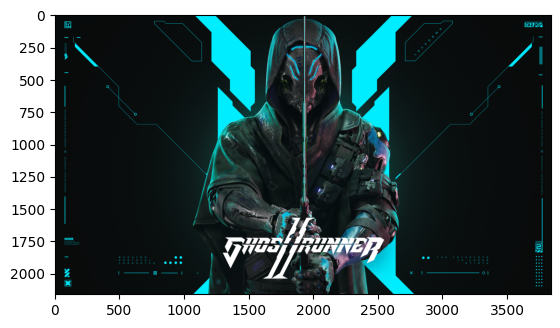

In [22]:
img = cv2.imread('MS_Static.png')
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img)
plt.show()


In [23]:
#pillow 
from PIL import Image
img1 = Image.open('MS_Static.png')
img1.show()
print(img.shape)  # height, width, channels
print(img.size)   # total number of pixel
print(img.dtype)  # image data type

(2160, 3840, 3)
24883200
uint8


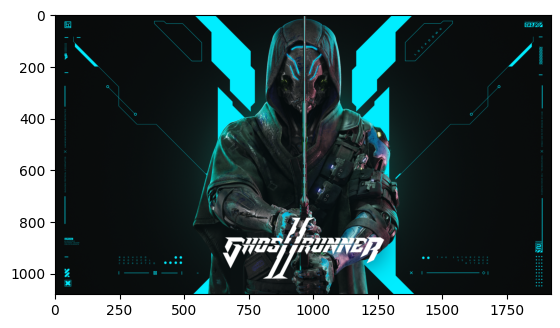

In [24]:
# Scaling --- change the size of the image either enlarging or shrinking
# Scaling  = cv2.resize(image, (new_width,new_height))

#scaled_image =  cv2.resize(img, (200, 200))  # new size
scaled_image = cv2.resize(img, (0,0),fx=0.5,fy=0.5)  # new size
# img = image
# 0,0 == no change in size
# fx, fy == scaling factor in x and y direction

plt.imshow(scaled_image)

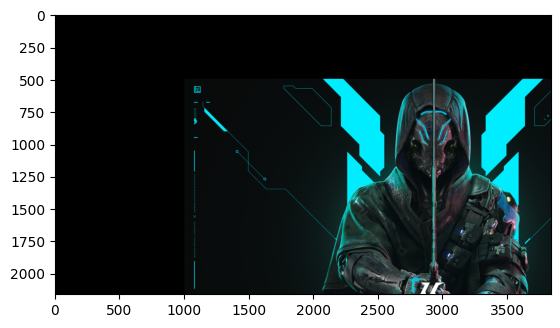

In [25]:
# translation --- changes the location of the image on the screen
import numpy as np
rows, cols = img.shape[:2]
tx , ty = 1000, 500 # translation factor in x and y direction
M = np.float32([[1, 0, tx], [0, 1, ty]])  # translation matrix

# [1, 0, tx] --
## 1 -- keep the x coordinate same
## 0 -- no change in y coordinate
## tx -- (translation factor) move the image in x direction by tx pixels
translated_image = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(translated_image)


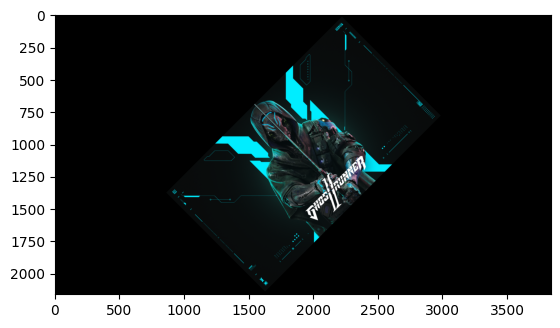

In [26]:
# Rotation
center = (cols // 2, rows // 2)  # center of the image
angle = 45  # angle of rotation
scale = 0.5  # scale factor
# scaler -- zoom in or out
# 1 == original image , <1 == zoom out, >1 == zoom in
M = cv2.getRotationMatrix2D(center, angle, scale)  # rotation matrix

#Affine -- translation, rotation, scaling, shearing
rotated_image = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(rotated_image)

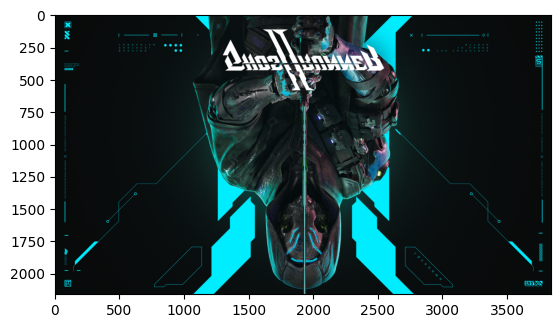

In [27]:
# Flipping  -- mirror image

flip_image = cv2.flip(img, 0)  
# 1 == horizontal flip, 
# 0 == vertical flip, 
# -1 == both
plt.imshow(flip_image)

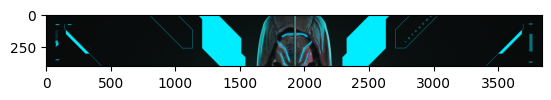

In [28]:
#  Cropping ---  cropping an image --- slicing an array
cropped_image = img[100:500, :]  # [y1:y2, x1:x2]
plt.imshow(cropped_image)

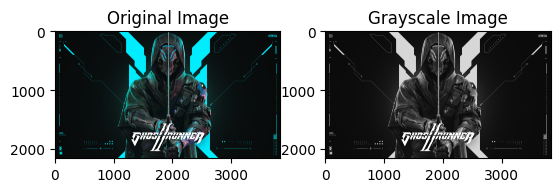

In [29]:
# RGB image to Grayscale image coversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\
# gray -- 0.3R + 0.59G + 0.11B
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(gray , cmap='gray')
plt.title('Grayscale Image')
plt.show()

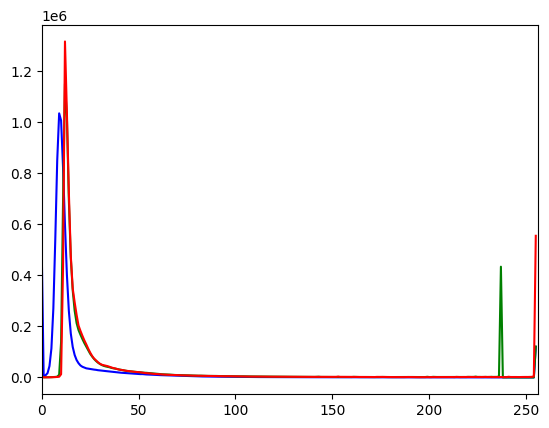

In [34]:
# Histogram -- distribution of pixel intensity values of an image
colors = ('b', 'g', 'r')  # BGR channels
for i, color in enumerate(colors):
    #plt.subplot(1, 3, i + 1)
    # i -- channel index (0 for blue, 1 for green, 2 for red)
    # none -- mask -- we are computing histogram for the whole image
    # [256] -- number of bins in the histogram
    # [0, 256] -- range of pixel values
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.show()

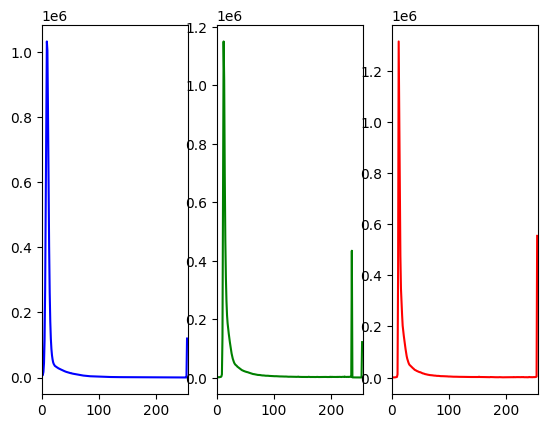

In [35]:

# Histogram -- distribution of pixel intensity values of an image
colors = ('b', 'g', 'r')  # BGR channels
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    # i -- channel index (0 for blue, 1 for green, 2 for red)
    # none -- mask -- we are computing histogram for the whole image
    # [256] -- number of bins in the histogram
    # [0, 256] -- range of pixel values
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.show()

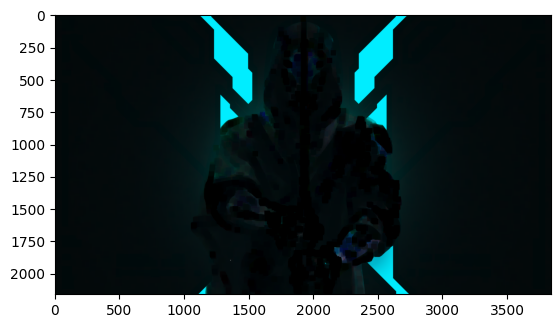

In [40]:
# Erosion -- removes pixels from the boundary of an object
# Dilation -- adds pixels to the boundary of an object

kernel = np.ones((5, 5), np.uint8)  # kernel size
# kernel -- structuring element used for erosion and dilation
erosion = cv2.erode(img, kernel, iterations=10)  # iterations -- number of times to apply erosion
dilate = cv2.dilate(img, kernel, iterations=10)  # iterations -- number of times to apply dilation
plt.imshow(erosion, cmap='gray') 